# Data Analysis Project: E-Commerce Public Dataset


## Business Questions

- How are the sales trends in this dataset?
- What are the best-selling and least-selling products?
- What are the demographics of the sellers?

## Preparing all the necessary libraries

In [287]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [288]:
pip install unidecode

In [428]:
pip install squarify

In [429]:
import numpy as np
import pandas as pd
import unidecode
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

## Data Wrangling

### Gathering Data

In [290]:
customers_df = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [291]:
geolocation_df = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [292]:
items_df = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/order_items_dataset.csv")
items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [293]:
payments_df = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/order_payments_dataset.csv")
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [294]:
reviews_df = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/order_reviews_dataset.csv")
reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [295]:
orders_df = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [296]:
category_df = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/product_category_name_translation.csv")
category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [297]:
products_df = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [298]:
sellers_df = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

####Customers

In [299]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [300]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [301]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [302]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


####Geolocation

In [303]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [304]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [305]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  261831


In [306]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


####Items

In [307]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Terdapat kesalahan tipe data untuk kolom shipping_limit_date

In [308]:
items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [309]:
print("Jumlah duplikasi: ", items_df.duplicated().sum())

Jumlah duplikasi:  0


In [310]:
items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


####Payments

In [311]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [312]:
payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [313]:
print("Jumlah duplikasi: ", payments_df.duplicated().sum())

Jumlah duplikasi:  0


In [314]:
payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


####Reviews

In [315]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Terdapat kesalahan tipe data untuk kolom review_creation_date dan review_answer_timestamp

In [316]:
reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [317]:
print("Jumlah duplikasi: ", reviews_df.duplicated().sum())

Jumlah duplikasi:  0


In [318]:
reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


####Orders

In [319]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Terdapat kesalahan tipe data untuk kolom order_purchase_timestamp order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date

In [320]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [321]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [322]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


####Category

In [323]:
category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [324]:
category_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [325]:
print("Jumlah duplikasi: ", category_df.duplicated().sum())

Jumlah duplikasi:  0


In [326]:
category_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


####Products

In [327]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [328]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [329]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


In [330]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


####Sellers

In [331]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [332]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [333]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())

Jumlah duplikasi:  0


In [334]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### Cleaning Data

Geolocation

In [335]:
geolocation_df['geolocation_city'].unique() # Duplicates occur due to the spelling of city names with accents.

array(['sao paulo', 'são paulo', 'sao bernardo do campo', ..., 'ciríaco',
       'estação', 'vila lângaro'], dtype=object)

In [336]:
def pretty_string(column):
    column_space = ' '.join(column.split())
    return unidecode.unidecode(column_space.lower())

In [337]:
geolocation_df['geolocation_city'] = geolocation_df['geolocation_city'].apply(pretty_string) # mengubah nama kota

In [338]:
geolocation_df = geolocation_df.drop_duplicates('geolocation_zip_code_prefix') # drop duplikasi yang lain
geolocation_df = geolocation_df.reset_index(drop=True)

Items

In [339]:
items_df['shipping_limit_date'] = pd.to_datetime(items_df['shipping_limit_date'], format='%Y-%m-%d %H:%M') # mengubah tipe data menjadi datetime

Reviews

In [340]:
# mengubah tipe data menjadi datetime
reviews_df['review_creation_date'] = pd.to_datetime(reviews_df['review_creation_date'], format='%Y-%m-%d %H:%M')
reviews_df['review_answer_timestamp'] = pd.to_datetime(reviews_df['review_answer_timestamp'], format='%Y-%m-%d %H:%M')

In [341]:
# pengisian missing value
reviews_df['review_comment_title'].fillna('No Review Title',inplace=True)
reviews_df['review_comment_message'].fillna('No Review Message',inplace=True)

Orders

In [342]:
# mengubah tipe data menjadi datetime
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'], format='%Y-%m-%d %H:%M')
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'], format='%Y-%m-%d %H:%M')
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'], format='%Y-%m-%d %H:%M')
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'], format='%Y-%m-%d %H:%M')
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'], format='%Y-%m-%d %H:%M')

In [343]:
# pengisian missing value
orders_df['order_approved_at'].fillna(orders_df['order_purchase_timestamp'], inplace=True)
orders_df['order_delivered_customer_date'].fillna(orders_df['order_estimated_delivery_date'],inplace = True)

Kolom order_delivered_carrier_date dibiarkan terlebih dahulu karena akan digunakan untuk RFM Analysis

Products

In [344]:
# pengisian missing value
products_df['product_weight_g'].fillna(products_df['product_weight_g'].median(), inplace  = True)
products_df['product_length_cm'].fillna(products_df['product_length_cm'].median(), inplace  = True)
products_df['product_height_cm'].fillna(products_df['product_height_cm'].median(), inplace  = True)
products_df['product_width_cm'].fillna(products_df['product_width_cm'].median(), inplace  = True)
products_df.drop(['product_name_lenght', 'product_description_lenght', 'product_photos_qty'], axis= 1, inplace= True)

In [345]:
products_df.product_category_name.value_counts() # mencari modus

cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_category_name, Length: 73, dtype: int64

In [346]:
products_df.fillna(value="cama_mesa_banho", inplace=True) # pengisian missing value

## Exploratory Data Analysis (EDA)

### Explore Customer

In [347]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [348]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [349]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

In [350]:
# mengecek berapa kali pelanggan order
customer_unique_ids = customers_df[['customer_unique_id']].to_numpy().flatten()
unique, counts = np.unique(customer_unique_ids, return_counts = True)
customer_unique_ids_counts = dict(zip(unique, counts))
count, count_of_counts = np.unique(counts, return_counts = True)
multiple_orders = dict(zip(count, count_of_counts))

### Explore Geolocation

In [351]:
geolocation_df.describe(include="all")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,19015.000000,19015.000000,19015.000000,19015,19015
unique,NaN,NaN,NaN,5771,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,3180,6349
mean,42711.591901,-19.062087,-46.058008,NaN,NaN
std,30905.051745,7.319402,5.380751,NaN,NaN
min,1001.000000,-36.605374,-72.927296,NaN,NaN
25%,12721.500000,-23.564386,-49.000445,NaN,NaN
50%,38240.000000,-22.429252,-46.632544,NaN,NaN
75%,70656.500000,-15.615448,-43.255324,NaN,NaN


###Explore Items

In [352]:
items_df.describe(include="all")

<ipython-input-352-ccea72df8936>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  items_df.describe(include="all")


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
first,NaN,NaN,NaN,NaN,2016-09-19 00:15:34,NaN,NaN
last,NaN,NaN,NaN,NaN,2020-04-09 22:35:08,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000


In [353]:
items_df.groupby(by="price").order_id.nunique().sort_values(ascending=False)

price
59.90      2087
69.90      1821
49.90      1675
89.90      1419
99.90      1319
           ... 
189.42        1
46.63         1
189.49        1
189.59        1
6735.00       1
Name: order_id, Length: 5968, dtype: int64

### Eksplore Payments

In [354]:
payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [355]:
payments_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

### Eksplore Reviews

In [356]:
reviews_df.describe(include="all")

<ipython-input-356-b32f5e178f2e>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  reviews_df.describe(include="all")
<ipython-input-356-b32f5e178f2e>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  reviews_df.describe(include="all")


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4528,36160,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,No Review Title,No Review Message,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,87656,58247,463,4
first,NaN,NaN,NaN,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
last,NaN,NaN,NaN,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN


In [357]:
reviews_df.groupby(by="review_score").review_id.nunique().sort_values(ascending=False)

review_score
5    56910
4    19007
1    11282
3     8097
2     3114
Name: review_id, dtype: int64

### Eksplore Orders

In [358]:
orders_df.describe(include="all")

<ipython-input-358-903538279252>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include="all")
<ipython-input-358-903538279252>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include="all")
<ipython-input-358-903538279252>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include="all")
<ipython-input-358-903538279252>:1: FutureW

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,97658,99441,99441
unique,99441,99441,8,98875,90893,81018,96088,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-02-06 00:00:00,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,20,522
first,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-09-30 00:00:00,2016-09-30 00:00:00
last,NaN,NaN,NaN,2018-10-17 17:30:18,2018-10-17 17:30:18,2018-09-11 19:48:28,2018-11-12 00:00:00,2018-11-12 00:00:00


In [359]:
orders_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

### Eksplore Category

In [360]:
category_df.describe(include="all")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


### Eksplore Products

In [361]:
products_df.describe(include="all")

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32951.000000,32951.000000,32951.000000,32951.000000
unique,32951,73,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN
freq,1,3639,NaN,NaN,NaN,NaN
mean,NaN,NaN,2276.376802,30.814725,16.937422,23.196534
std,NaN,NaN,4281.926387,16.914005,13.637175,12.078707
min,NaN,NaN,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,1900.000000,38.000000,21.000000,30.000000


In [362]:
products_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False)

product_category_name
cama_mesa_banho                  3639
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
casa_conforto_2                     5
fashion_roupa_infanto_juvenil       5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_id, Length: 73, dtype: int64

### Eksplore Sellers

In [363]:
sellers_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [364]:
sellers_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
                 ... 
ivoti               1
itirapina           1
itau de minas       1
itapui              1
xaxim               1
Name: seller_id, Length: 611, dtype: int64

In [365]:
sellers_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AC       1
PI       1
AM       1
MA       1
PA       1
Name: seller_id, dtype: int64

### Eksplore Data All

In [366]:
# merge
all_df = customers_df.merge(
    geolocation_df.rename(columns={"geolocation_zip_code_prefix": "customer_zip_code_prefix"}),
    on="customer_zip_code_prefix",
    how='left'
)

In [367]:
# merge
all_df = all_df.merge(orders_df, on="customer_id", how='inner')
all_df = all_df.merge(reviews_df, on="order_id", how='inner')
all_df = all_df.merge(items_df, on="order_id", how='inner')
all_df = all_df.merge(products_df, on="product_id", how='inner')
all_df = all_df.merge(payments_df, on="order_id", how='inner')
all_df = all_df.merge(sellers_df, on='seller_id', how='inner')
all_df = all_df.merge(category_df, on='product_category_name', how='inner')
all_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,order_id,...,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866,franca,SP,00e7ee1b050b8499577073aeb2a297a1,...,64.0,31.0,1,credit_card,2,146.87,8577,itaquaquecetuba,SP,office_furniture
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,-2.442747,-54.728950,santarem,PA,c1d2b34febe9cd269e378117d6681172,...,64.0,31.0,1,credit_card,1,275.79,8577,itaquaquecetuba,SP,office_furniture
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,-2.442747,-54.728950,santarem,PA,c1d2b34febe9cd269e378117d6681172,...,64.0,31.0,1,credit_card,1,275.79,8577,itaquaquecetuba,SP,office_furniture
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,-29.856534,-51.268958,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,...,64.0,31.0,1,credit_card,7,140.61,8577,itaquaquecetuba,SP,office_furniture
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,-22.627556,-43.159942,mage,RJ,2e604b3614664aa66867856dba7e61b7,...,64.0,31.0,1,credit_card,10,137.58,8577,itaquaquecetuba,SP,office_furniture


In [368]:
all_df['order_purchase_year_month'] = all_df['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y-%m')) # mengambil bulan dan tahun dari timestamp

In [369]:
# status kedatangan delivery (ontime/early dan late)
all_df['arrival_status'] = np.where((all_df['order_estimated_delivery_date'] - all_df['order_delivered_customer_date']).dt.days >= 0, 'OnTime/Early', 'Late')
all_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,order_id,...,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,order_purchase_year_month,arrival_status
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866,franca,SP,00e7ee1b050b8499577073aeb2a297a1,...,1,credit_card,2,146.87,8577,itaquaquecetuba,SP,office_furniture,2017-05,OnTime/Early
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,-2.442747,-54.728950,santarem,PA,c1d2b34febe9cd269e378117d6681172,...,1,credit_card,1,275.79,8577,itaquaquecetuba,SP,office_furniture,2017-11,OnTime/Early
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,-2.442747,-54.728950,santarem,PA,c1d2b34febe9cd269e378117d6681172,...,1,credit_card,1,275.79,8577,itaquaquecetuba,SP,office_furniture,2017-11,OnTime/Early
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,-29.856534,-51.268958,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,...,1,credit_card,7,140.61,8577,itaquaquecetuba,SP,office_furniture,2017-05,OnTime/Early
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,-22.627556,-43.159942,mage,RJ,2e604b3614664aa66867856dba7e61b7,...,1,credit_card,10,137.58,8577,itaquaquecetuba,SP,office_furniture,2018-02,OnTime/Early


## Visualization & Explanatory Analysis

### Bagaimana tren penjualan dalam dataset ini?

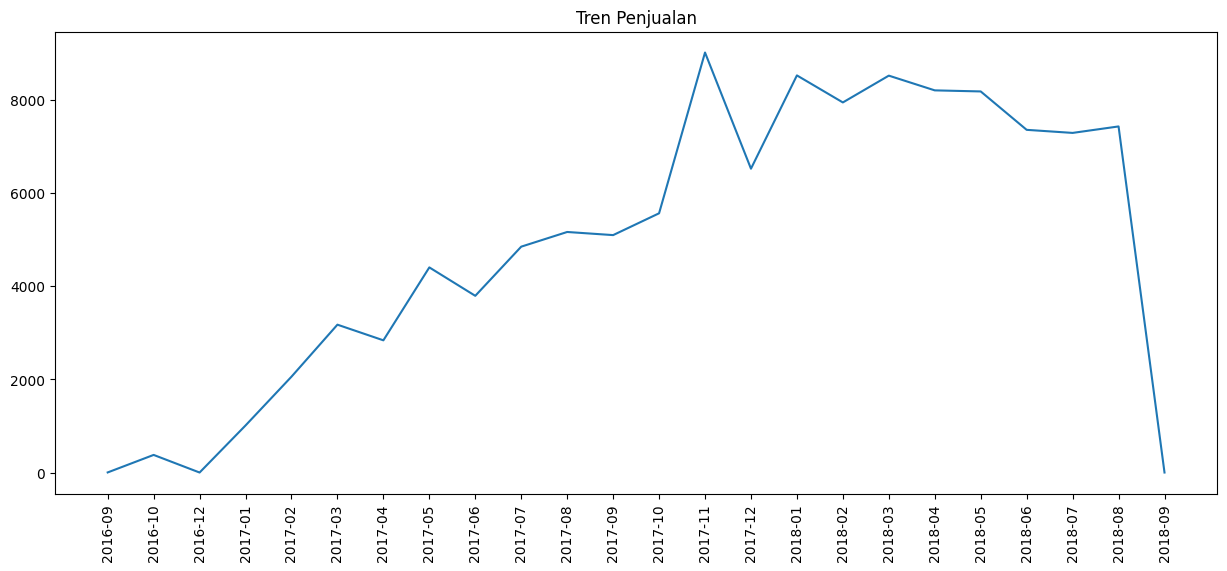

In [370]:
plt.figure(figsize=(15,6))
plt.plot(all_df["order_purchase_year_month"].value_counts().sort_index())
plt.title('Tren Penjualan')
plt.xticks(rotation=90)
plt.show()

### Produk apa yang paling banyak dan paling sedikit terjual?

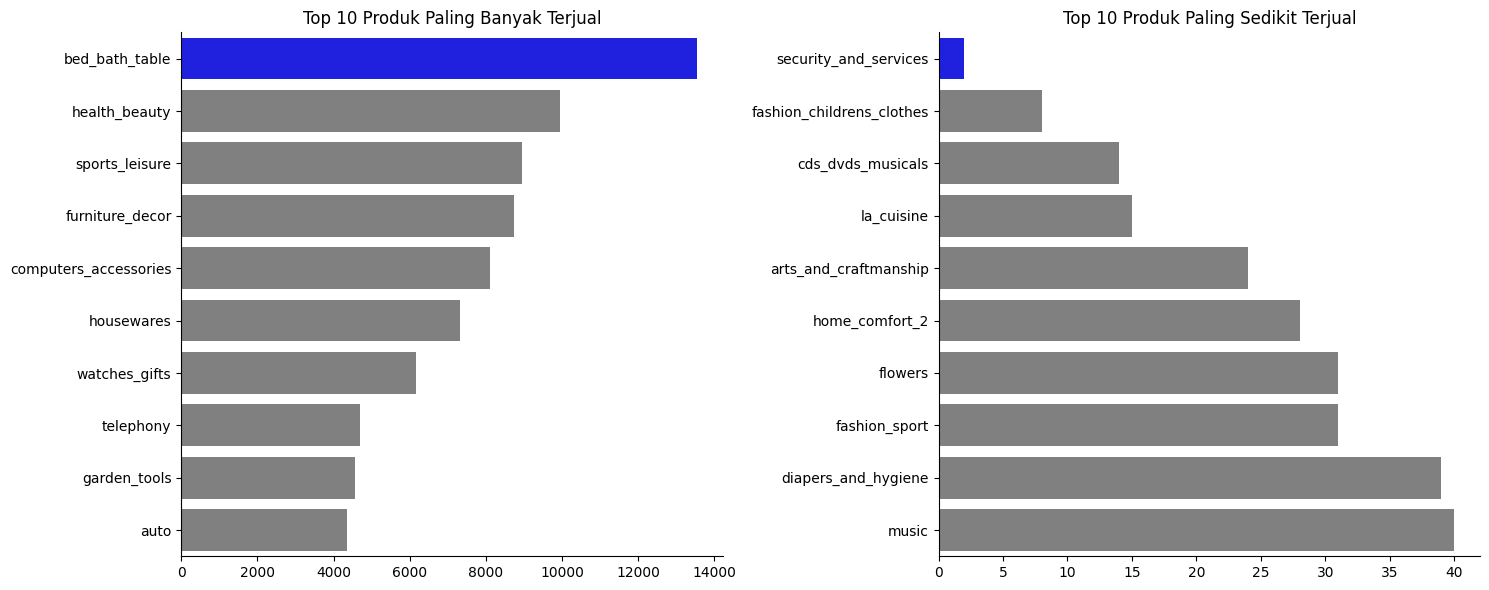

In [371]:
data = all_df.product_category_name_english.value_counts()

# Menentukan warna untuk highlight
highlight_color = ["blue" if x == data.idxmax() else "gray" for x in data.index]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Subplot pertama - Top 10 Produk Paling Banyak Terjual
sns.barplot(x=data.values[:10], y=data.index[:10], palette=highlight_color[:10], ax=axes[0])
axes[0].set_title('Top 10 Produk Paling Banyak Terjual')
axes[0].tick_params(axis='x')
sns.despine(ax=axes[0])

# Subplot kedua - Top 10 Produk Paling Sedikit Terjual
sorted_counts = all_df.product_category_name_english.value_counts().sort_values()
sns.barplot(x=sorted_counts.values[:10], y=sorted_counts.index[:10], palette=highlight_color[:10], ax=axes[1])
axes[1].set_title('Top 10 Produk Paling Sedikit Terjual')
axes[1].tick_params(axis='y')
sns.despine(ax=axes[1])

plt.tight_layout()
plt.show()

### Bagaimana demografi dari pelanggan?

Berdasarkan Kota dan Negara Bagian

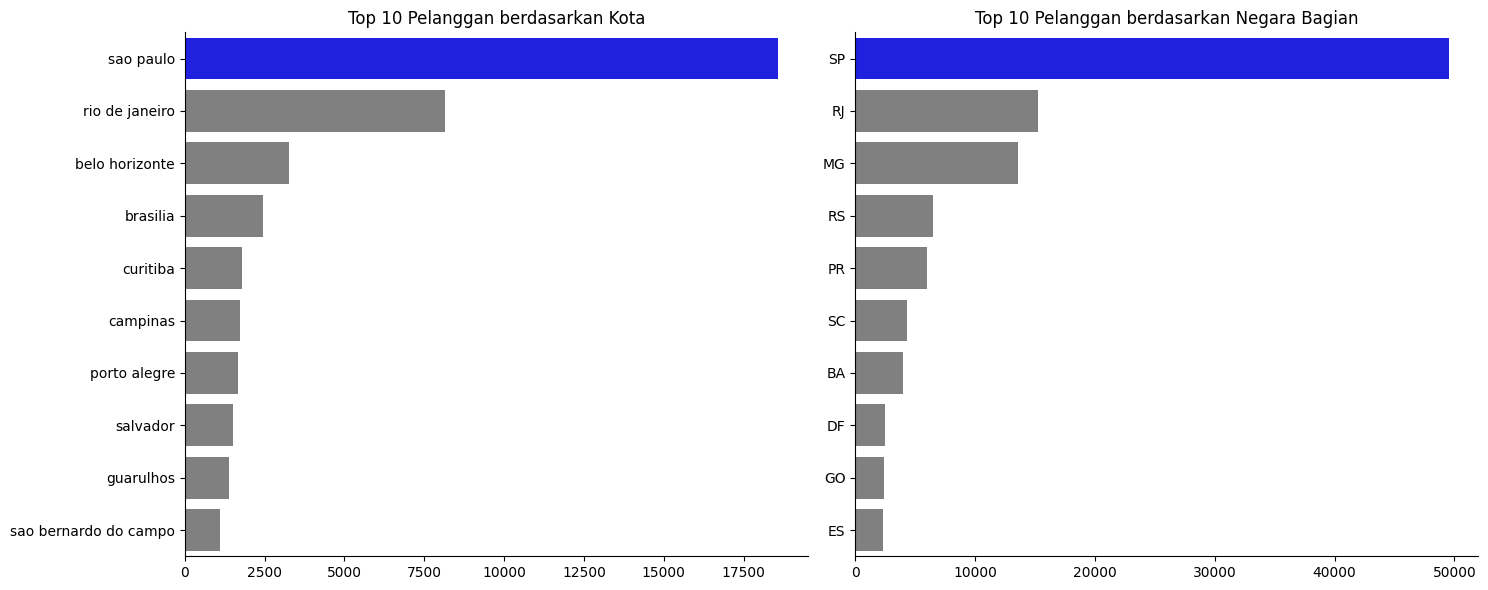

In [372]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

highlight_color = ["blue" if x == data.idxmax() else "gray" for x in data.index]

# Subplot pertama - Top 10 Pelanggan berdasarkan Kota
sns.barplot(x=all_df['customer_city'].value_counts().values[:10],
            y=all_df['customer_city'].value_counts().index[:10],
            palette=highlight_color[:10], ax=axes[0])
axes[0].set_title('Top 10 Pelanggan berdasarkan Kota')
axes[0].tick_params(axis='x')
sns.despine(ax=axes[0])

# Subplot kedua - Top 10 Pelanggan berdasarkan Negara Bagian
sns.barplot(x=all_df['customer_state'].value_counts().values[:10],
            y=all_df['customer_state'].value_counts().index[:10],
            palette=highlight_color[:10], ax=axes[1])
axes[1].set_title('Top 10 Pelanggan berdasarkan Negara Bagian')
axes[1].tick_params(axis='x')
sns.despine(ax=axes[1])

plt.tight_layout()
plt.show()

Berdasarkan Tipe Pembayaran

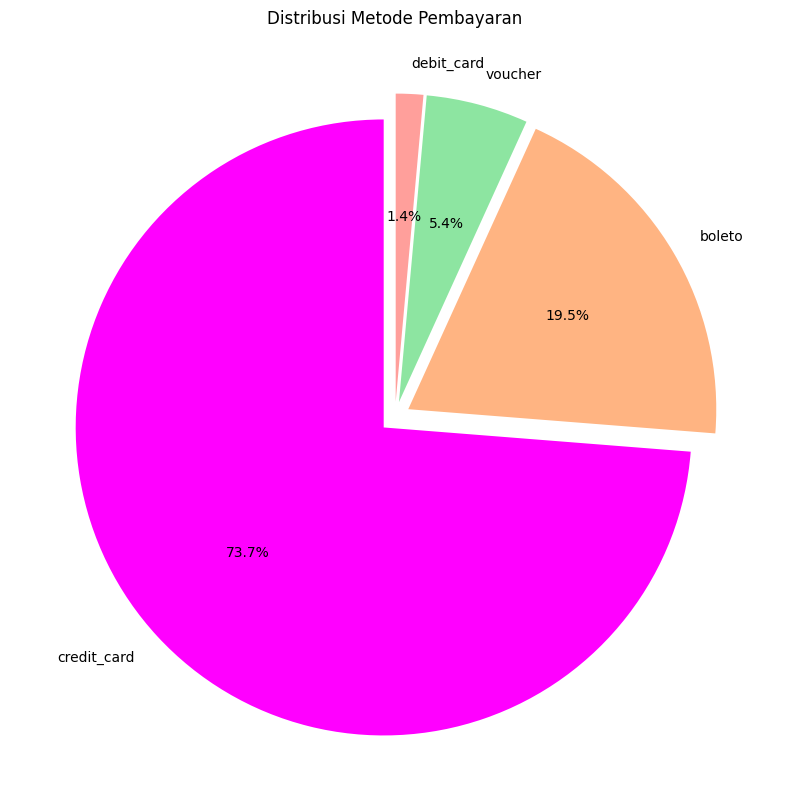

In [373]:
payment_counts = all_df['payment_type'].value_counts()

pastel_colors = sns.color_palette("pastel", len(payment_counts))
colors = ['magenta' if x == payment_counts.idxmax() else pastel_colors[i] for i, x in enumerate(payment_counts.index)]

plt.figure(figsize=[10, 10])
plt.pie(payment_counts.values,
        explode=(0.05, 0.05, 0.05, 0.05),
        labels=payment_counts.index,
        autopct='%1.1f%%',
        shadow=False,
        startangle=90,
        colors=colors
       )
plt.title('Distribusi Metode Pembayaran')
plt.show()

Berdasarkan Skor Review

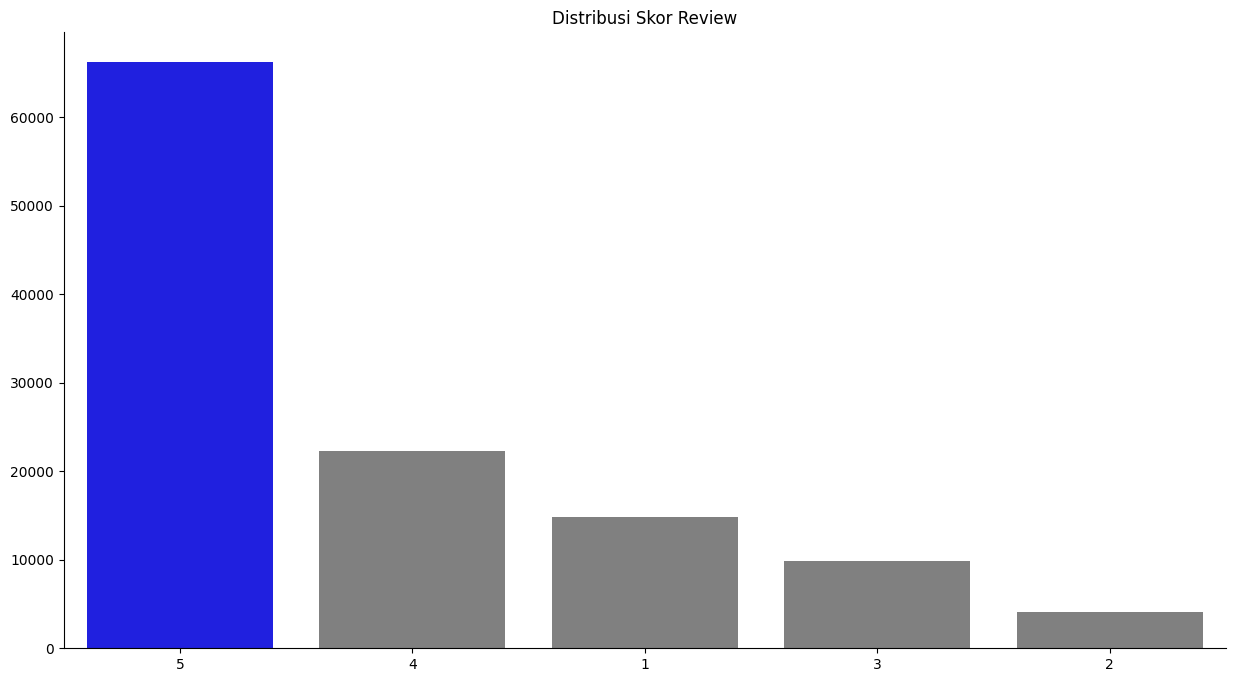

In [374]:
highlight_color = ["blue" if x == data.idxmax() else "gray" for x in data.index]

plt.figure(figsize=[15, 8])
review_score_index = [str(i) for i in all_df['review_score'].value_counts().index]
sns.barplot(x = review_score_index, y= all_df['review_score'].value_counts().values, palette= highlight_color)
plt.title('Distribusi Skor Review')
sns.despine()

Berdasarkan Jumlah Pesanan

Text(0.5, 1.0, 'Jumlah Pesanan Pelanggan')

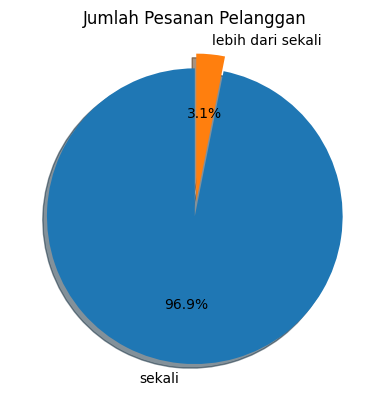

In [375]:
labels = 'sekali', 'lebih dari sekali'
sizes = multiple_orders[1], sum(multiple_orders.values()) - multiple_orders[1]
explode = (0,0.1)
plt.pie(
    sizes,
    explode=explode,
    labels=labels,
    autopct='%1.1f%%',
    shadow=True,
    startangle=90
)
plt.title('Jumlah Pesanan Pelanggan')

## Conclusion

- Secara umum, penjualan meningkat dari bulan September 2016 hingga Maret 2018. Terdapat penurunan tajam pada dari bulan Maret 2018 hingga September 2018. Penjualan tertinggi adalah sebanyak 8000 yang terjadi sekitar awal tahun 2018.
- Produk yang paling banyak terjual adalah "bed bath table" dan produk yang paling sedikit terjual adalah "security and services".
- Pelanggan paling banyak berasal dari Kota Sao Paulo dan negara bagian SP, membayar menggunakan kartu kredit, dan memberikan skor 5 pada review. Akan tetapi, kebanyakan pelanggan hanya melakukan pesanan sebanyak satu kali.

## RFM Analysis

In [400]:
last_date = all_df['order_delivered_carrier_date'].max() + pd.to_timedelta(1, 'D')

rfm_df = all_df.dropna(subset=['order_delivered_carrier_date'])\
            .reset_index()\
            .groupby('customer_id')\
            .agg(recency = ('order_delivered_carrier_date', lambda x: (last_date - x.max()).days ),
                 frequency = ('order_id', 'size'),
                 monetary = ('payment_value', 'sum'))

In [401]:
rfm_df

,recency,frequency,monetary
customer_id,,,
00012a2ce6f8dcda20d059ce98491703,299,1,114.74
000161a058600d5901f007fab4c27140,420,1,67.41
0001fd6190edaaf884bcaf3d49edf079,560,1,195.42
0002414f95344307404f0ace7a26f1d5,389,1,179.35
000379cdec625522490c315e70c7a9fb,161,1,107.01
...,...,...,...
fffcb937e9dd47a13f05ecb8290f4d3e,179,1,91.91
fffecc9f79fd8c764f843e9951b11341,165,3,81.36
fffeda5b6d849fbd39689bb92087f431,110,1,63.13


In [402]:
rfm_df.describe()

,recency,frequency,monetary
count,96906.000000,96906.000000,96906.000000
mean,250.384692,1.197769,204.924572
std,152.682141,0.749310,605.725341
min,1.000000,1.000000,9.590000
25%,127.000000,1.000000,62.800000
50%,231.000000,1.000000,109.810000
75%,359.000000,1.000000,195.887500
max,704.000000,63.000000,109312.640000


In [403]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

,recency,frequency,monetary
customer_id,,,
a35878bee339b45240b5a327d933509b,1,1,42.50
4b7decb9b58e2569548b8b4c8e20e8d7,8,1,166.46
548692bdcbd6e3683ff306ac9d8418d6,9,1,2455.12
5f1f934f0527b0822763ecfc7a918ca7,12,3,182.61
c4f27e4018dec8c1bb82c0e2ce63d47e,12,1,58.57


In [404]:
rfm_df.sort_values(by="frequency", ascending=False).head(5)

,recency,frequency,monetary
customer_id,,,
270c23a11d024a44c896d1894b261a83,398,63,483.96
13aa59158da63ba0e93ec6ac2c07aacb,344,38,411.48
9af2372a1e49340278e7c1ef8d749f34,506,29,457.99
92cd3ec6e2d643d4ebd0e3d6238f69e2,453,26,62.68
6ee2f17e3b6c33d6a9557f280edd2925,546,24,850.80


In [407]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head()

,recency,frequency,monetary,r_rank,f_rank,m_rank
customer_id,,,,,,
00012a2ce6f8dcda20d059ce98491703,299,1,114.74,32965.0,42133.5,50344.0
000161a058600d5901f007fab4c27140,420,1,67.41,16179.5,42133.5,27413.0
0001fd6190edaaf884bcaf3d49edf079,560,1,195.42,2459.5,42133.5,72605.5
0002414f95344307404f0ace7a26f1d5,389,1,179.35,20377.5,42133.5,69647.0
000379cdec625522490c315e70c7a9fb,161,1,107.01,64633.0,42133.5,47357.5


In [408]:
# normalizing the rank of the customers
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100

rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)

rfm_df.head()

,recency,frequency,monetary,r_rank_norm,f_rank_norm,m_rank_norm
customer_id,,,,,,
00012a2ce6f8dcda20d059ce98491703,299,1,114.74,34.017501,43.478732,51.951376
000161a058600d5901f007fab4c27140,420,1,67.41,16.696077,43.478732,28.288238
0001fd6190edaaf884bcaf3d49edf079,560,1,195.42,2.538027,43.478732,74.923637
0002414f95344307404f0ace7a26f1d5,389,1,179.35,21.028110,43.478732,71.870679
000379cdec625522490c315e70c7a9fb,161,1,107.01,66.696593,43.478732,48.869523


In [411]:
rfm_df['RFM_score'] = 0.15*rfm_df['r_rank_norm']+0.28 * \
    rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df.head(5)

,recency,frequency,monetary,r_rank_norm,f_rank_norm,m_rank_norm,RFM_score
customer_id,,,,,,,
00012a2ce6f8dcda20d059ce98491703,299,1,114.74,34.02,43.48,51.95,2.34
000161a058600d5901f007fab4c27140,420,1,67.41,16.70,43.48,28.29,1.54
0001fd6190edaaf884bcaf3d49edf079,560,1,195.42,2.54,43.48,74.92,2.76
0002414f95344307404f0ace7a26f1d5,389,1,179.35,21.03,43.48,71.87,2.81
000379cdec625522490c315e70c7a9fb,161,1,107.01,66.70,43.48,48.87,2.50


In [436]:
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top", (np.where(
        rfm_df['RFM_score'] > 4, "High",(np.where(
            rfm_df['RFM_score'] > 3, "Medium", np.where(
                rfm_df['RFM_score'] > 1.6, 'Low', 'lost customers'))))))

rfm_df[['RFM_score', 'customer_segment']].head(5)

,RFM_score,customer_segment
customer_id,,
00012a2ce6f8dcda20d059ce98491703,2.34,Low
000161a058600d5901f007fab4c27140,1.54,lost customers
0001fd6190edaaf884bcaf3d49edf079,2.76,Low
0002414f95344307404f0ace7a26f1d5,2.81,Low
000379cdec625522490c315e70c7a9fb,2.50,Low


In [437]:
segmentwise = rfm_df.groupby('customer_segment').agg(RecencyMean = ('recency', 'mean'),
                                          FrequencyMean = ('frequency', 'mean'),
                                          MonetaryMean = ('monetary', 'mean'),
                                          GroupSize = ('recency', 'size'))
segmentwise

,RecencyMean,FrequencyMean,MonetaryMean,GroupSize
customer_segment,,,,
High,236.981443,2.404658,730.754954,5281
Low,249.255222,1.054262,104.786644,46054
Medium,220.368401,1.198715,318.608621,23184
Top,109.426074,3.267233,1457.803741,2002
lost customers,304.389895,1.005004,42.595744,20385


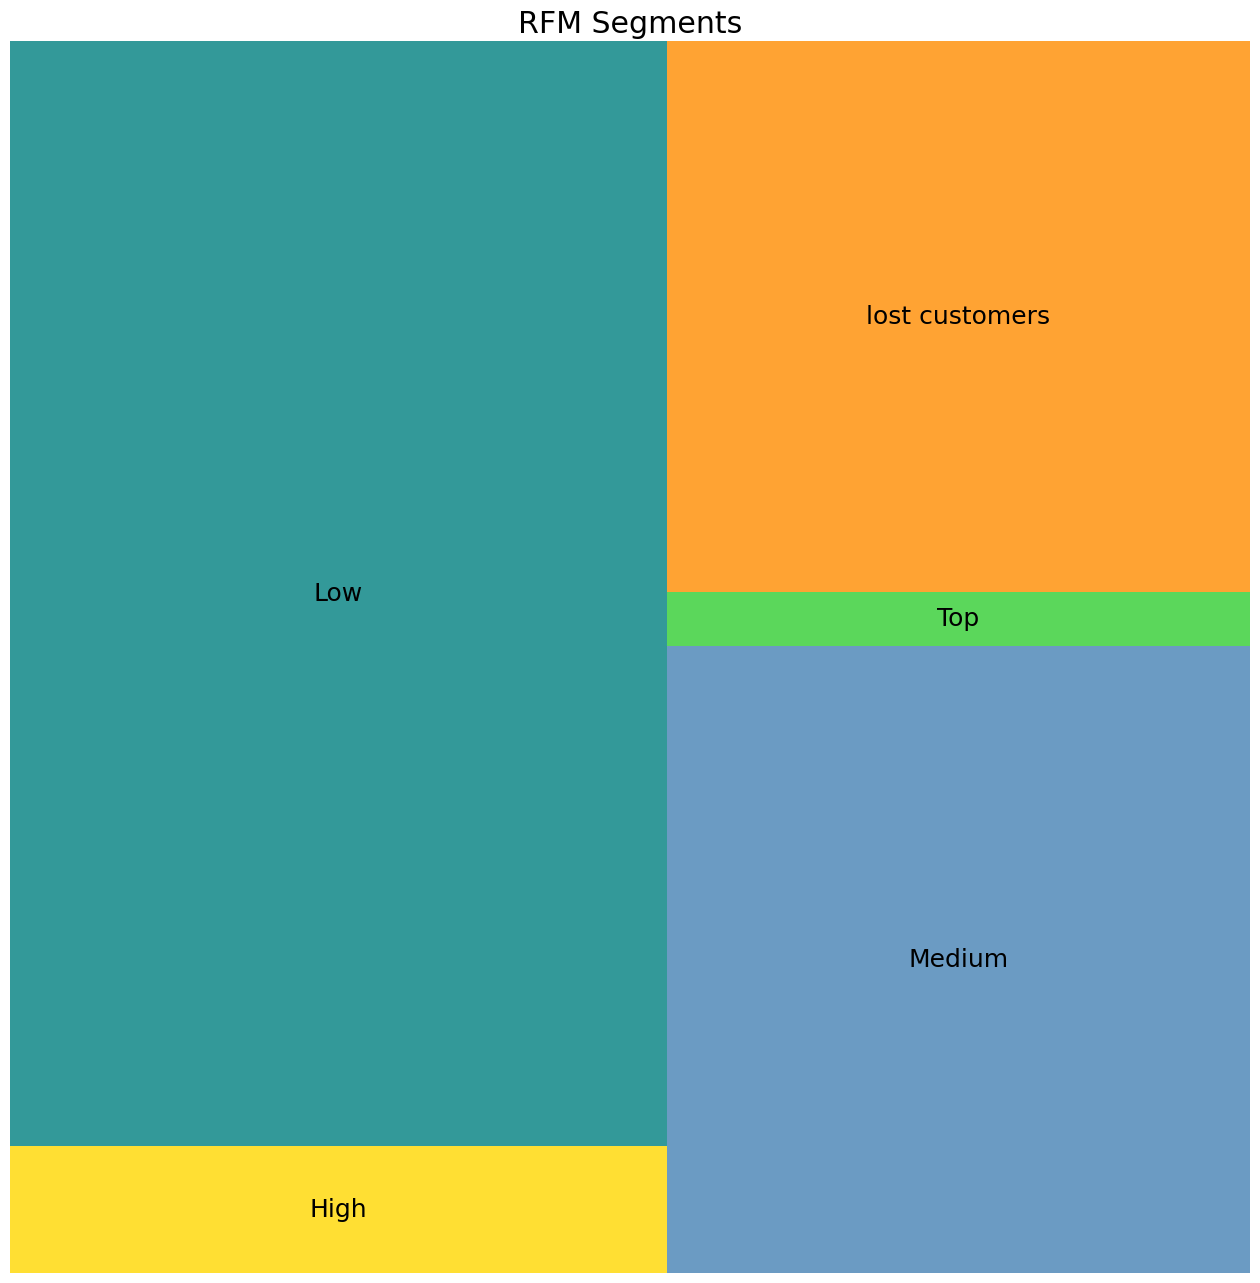

In [438]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 16)
squarify.plot(sizes = segmentwise['GroupSize'],
              label = segmentwise.index,
              color = ['gold', 'teal', 'steelblue', 'limegreen', 'darkorange', 'coral'],
              alpha = 0.8)
plt.title("RFM Segments")
plt.axis('off')
plt.show()